<a href="https://colab.research.google.com/github/govindvarma1/Machine-Learning/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from sklearn.tree import export_graphviz

In [2]:
mnist = pd.read_csv("sample_data/mnist_train_small.csv")
x = mnist[mnist.columns.difference(["6"])]
y = mnist["6"]
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

In [3]:
x_train
mnist.shape

(19999, 785)

In [4]:
y_train

,6
252,4
16866,9
19137,4
2100,7
14864,2
...,...
10288,5
9403,7
14354,0
4736,2


In [5]:
model = RandomForestClassifier(50, max_depth=15, max_features=150)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_val, y_val))
print(model.score(x_test, y_test))

0.997343542464255
0.95125
0.94125


In [9]:
model2 = XGBClassifier(objective='multiclass:softmax', learning_rate = 0.1,
              max_depth = 15, n_estimators = 50)
model2.fit(x_train, y_train)
preds = model2.predict(x_test)

In [8]:
y_pred = model2.predict(x_test)
accuracy_score(y_test, y_pred)

0.9455

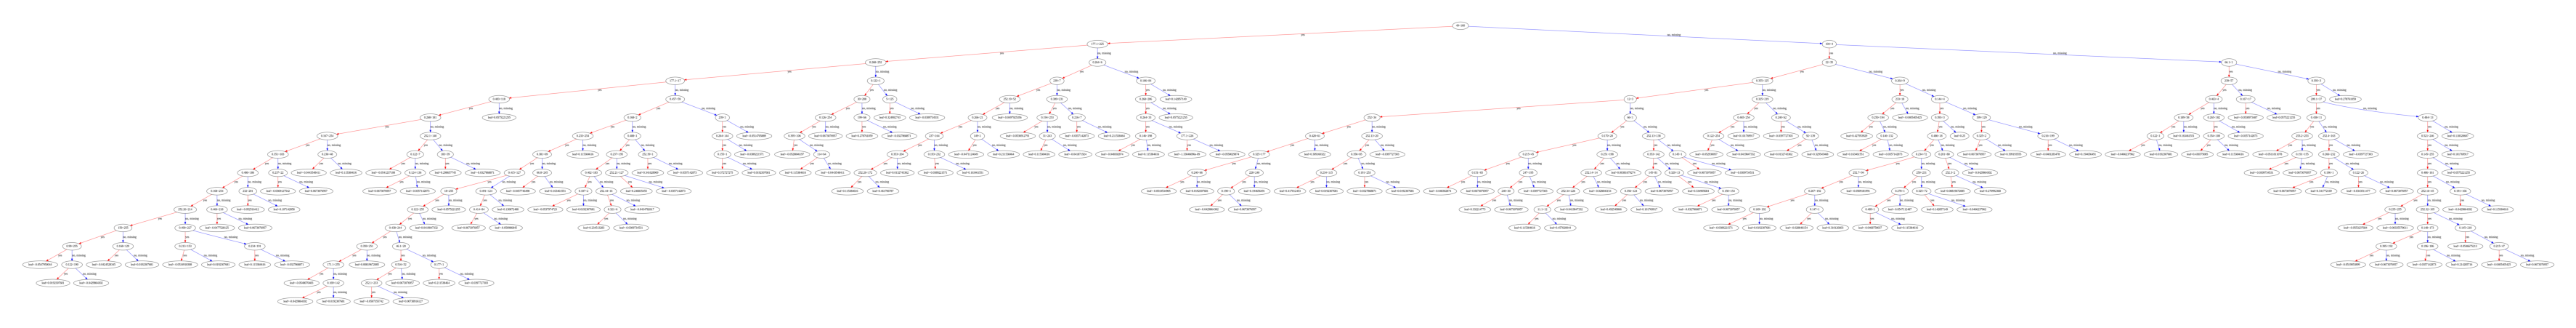

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust width and height as needed

plot_tree(model2, num_trees=3, ax=ax)  # Pass the ax object to plot_tree

plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.size'] = 20

plt.show()